## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
np.set_printoptions(linewidth=200)
print(tf.__version__)

2.3.0


### Process Dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Shape of Inputs:  (28, 28)
Label:  5
Image: 


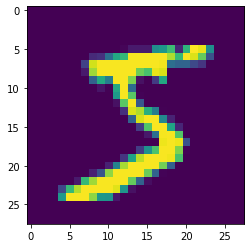

In [3]:
print("Shape of Inputs: ", x_train[0].shape)
print("Label: ", y_train[0])

# Let's take a look at one of the images
print("Image: ")
plt.imshow(x_train[0])

In [4]:
# Normalize the Dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# Reshaping Dataset
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

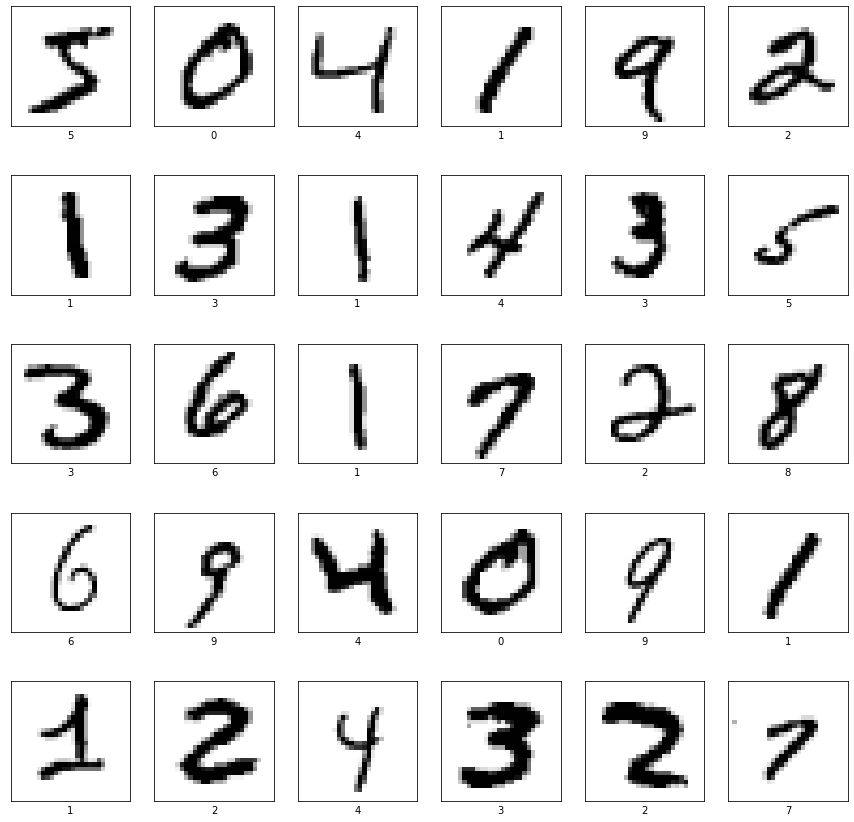

In [6]:
# Let's see some images to verify the images are correctly processed
plt.figure(figsize=(15,15))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Setting Callbacks

In [7]:
class accuracyLimit(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.05):
            print("\n----------Reached Accuracy Limit----------")
            self.model.stop_training = True
accuracyCallback = accuracyLimit()

### Global Functions

In [8]:
# Returns index of the max element in an array
def maxIndex(array):
    maxIndex = 0
    maxElement = array[0]
    for index in range(1, len(array)):
        if array[index] > maxElement:
            maxElement = array[index]
            maxIndex = index
    return maxIndex

In [9]:
# Prints a specified number of predictions and compares with actual
def evaluatePredictions(total, labels, predictions):
    for index in range(0, total):
        print("Element: ", index+1, " ---------------", maxIndex(predictions[index]) == labels[index])
        print("Predicted: ", maxIndex(predictions[index]))
        print("Actual: ", labels[index])

### Setting Up the Model

In [10]:
# Model Definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [11]:
# Model Compilation & Training
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy')
model.fit(x_train, y_train, epochs = 10, callbacks = [accuracyCallback])

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1691
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0600
Epoch 3/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0345
----------Reached Accuracy Limit----------
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0345


In [12]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Model Performance
print(model.metrics_names, ' : ', model.evaluate(x_test, y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.0644
['loss']  :  0.0644470751285553


In [14]:
# Predictions
classifications = model.predict(x_test)
evaluatePredictions(5, y_test, classifications)

Element:  1  --------------- True
Predicted:  7
Actual:  7
Element:  2  --------------- True
Predicted:  2
Actual:  2
Element:  3  --------------- True
Predicted:  1
Actual:  1
Element:  4  --------------- True
Predicted:  0
Actual:  0
Element:  5  --------------- True
Predicted:  4
Actual:  4
